<a href="https://colab.research.google.com/github/bserridge/Pig/blob/main/Pig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Introduction to the game of Pig

This is part 1 in the Pig series. In this section, we introduce the basic game and the core functions that will be needed later.

Here are the rules for the dice game "Pig", simplified to assume a one-player, one-die version of the game:

Goal: Score at least 100 points in as few turns as possible.

Playing the Game: The player starts off with a score of zero. A turn is a series of rolls of a standard, 6-sided die, with each roll of the die adding to the point total for that turn. A turn can end in one of two ways: (1) the player can choose to end the turn, in which case the player's score is increased by the points accumulated on that turn; or (2) the player chooses to roll the die and rolls a one, in which case the turn is over and is worth zero points. The game is over when the player ends a turn with a score of 100 or more points.

Example: A player rolls a 5, then a 4. Her total is 9. She decides to end the turn rather than risking a roll of a 1, scoring 9 points for the first turn. She starts her second turn by rolling a 4, then another 4. At this point, she has accumulated 8 points on the second turn, but the score is still 9. She rolls again and gets a 1. Because of that, the second turn is worth zero points, and the player has now used two turns to earn a total of 9 points. On her third turn she rolls a one right away, so that turn is worth zero points. On her fourth turn she rolls a 3, then a 6, then a 2, and decides to end the turn. She now has 9 + (3 + 6 + 2) = 20 points total, and has taken four turns. The game continues in this manner, until reaching 100 points (or more).

To see how this game works in action, we're going to code a version of it in Python that prints out what's going on in the game. As for deciding whether to stop or not, we'll make a really simple function for making that decision. Later on, we'll evaluate how good that function is. For starters, we'll set up some global variables:

First, some really basic stuff that will come in handy:

In [ ]:
import random # to randomize the rolls of the die
import math # for basic functions

# a function to roll the die and return the value rolled

def RollTheDie():
  roll = random.randint(1, 6)
  return roll


We're going to need a function to decide whether to roll again or stop the turn. As input to that function we'll want to know the score as of the start of this turn, and the points accumulated thus far on this turn. For starters, we'll take a simple rule that says: if we've scored more than 20 points so far on this turn, stop:

In [ ]:
# the RollAgain20 function makes a decision, as to whether to roll again or not (it's the player's choice)
def RollAgain20(score, points, goal):

  if ((points > 20) or ((score + points) >= goal)):
    return False
  else:
    return True

And now we define the function for taking a turn:

In [ ]:
# the TakeATurn function keeps rolling until the turn is over, and returns the number of points earned on that turn
# NOTE that the turn can end by rolling a 1 (0 points) or by making a decision to not RollAgain

def TakeATurn(score, goal, RollAgainFunction):

  points = 0

  while RollAgainFunction(score, points, goal):
      roll = RollTheDie()
      if roll == 1:
        return 0
      else:
        points += roll
  # end while

  # if we get this far, it's because we've decided not to roll again, the turn is over
  return points


And finally, we can combine all three to play a whole game. We'll define it as a function too, because later we may want to play lots of games.

In [ ]:
def PlayPig(goal, RollAgainFunction):

  score = 0
  turns = 0

  while score < goal:
    turns += 1
    points = TakeATurn(score, goal, RollAgainFunction)
    score += points
  # end while

  return turns

And finally, at the global level, we'll run our game:

In [ ]:
goal = 30
turns = PlayPig(goal, RollAgain20)
print(f'It took us {turns} turns to get to {goal} points')

It took us 5 turns to get to 30 points


# Part 2 - Simulations & statistics

This is part 2 in the Pig series, in which we'll use the core game functions from Part 1 to do some basic simulations, and then look at the statistical distributions that arise. Some questions that guide us:

How many turns should we expect it to take, on average, to hit our goal?

Is there a better decision function that we could be using instead?

I bet the answer can be derived using statistics, but in the spirit of learning useful coding techniques, we can also run an experiment.

For example, if we run the game 1000 times, what's the average value? Is the distribution a bell curve? If we change the goal, how does that change the number of turns required? Is the relationship linear?

To explore those, we'll rely on some help from some Python libraries:

In [ ]:
import numpy as np # see https://numpy.org/doc/stable/user/
import pandas as pd # data frames, see https://pandas.pydata.org/docs/user_guide/index.html
import matplotlib.pyplot as plt # data visualization, see https://matplotlib.org/stable/users/index.html

Now, let's create a function that plays the game many times for each of the goals specified:

In [ ]:
def ExperimentPig(num_games, goals, RollAgainFunction):

  pig_dict = {}

  for goal in goals:
    pig_dict[goal] = [] # create an empty list for the games played with this goal
    for i in range(0, num_games):
      turns = PlayPig(goal, RollAgainFunction)
      pig_dict[goal].append(turns)
    # end for
  # end for

  return pig_dict


To do numerical processing on the data, it's helpful to have it stored as a Pandas DataFrame, with the target scores being the headers of each column, and the number of turns needed in each game played populating the Series associated with each header. So we call ExperimentPig to run the experiment, and then create a DataFrame from the resulting dictionary:

In [ ]:
# np.arange defines the goals that we want to play for: 25, 50, 75, 100
# 100 is how many games we're going to play with each goal
# the result is a dictionary mapping the goals to a list representing the number of turns that each experiment took

goals = np.arange(10, 101, 10)
pig_dict = ExperimentPig(10_000, goals, RollAgain20)

pig_df = pd.DataFrame(pig_dict) # convert the dictionary into a DataFrame
pig_df.head() # print out just the first 5 rows


,10,20,30,40,50,60,70,80,90,100
0,3,1,4,3,8,4,11,14,10,10
1,1,3,11,2,10,7,5,11,16,14
2,1,2,16,8,5,6,8,10,8,30
3,3,1,4,5,6,5,11,10,10,7
4,2,2,5,3,3,12,16,6,5,11


Ok, so now we're ready to do some statistics:

In [ ]:
print('Average:')
print(pig_df.mean())

print()

print('Median')
print(pig_df.median())


Average:
10      1.6917
20      2.6683
30      4.2927
40      5.1731
50      6.8444
60      7.6514
70      9.1968
80     10.2727
90     11.4906
100    12.8397
dtype: float64

Median
10      1.0
20      2.0
30      4.0
40      4.0
50      6.0
60      7.0
70      8.0
80     10.0
90     11.0
100    12.0
dtype: float64


As we'd expect, the higher the goal, the more turns it takes to reach it. Let's visualize that relationship:

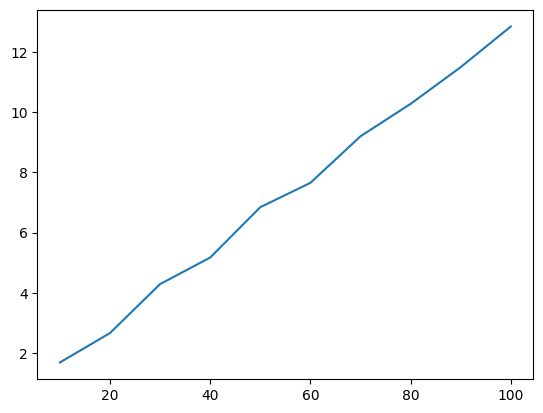

In [ ]:
fig, ax = plt.subplots()  # Create a figure
ax.plot(goals, pig_df.mean())  # Plot the data

Hmmm, that's interesting. It doesn't look linear, the multiples of 20 seem to have an advantage as compared to the multiples of 10 that are in-between.

Let's look at a boxplot to get a better idea of how wide the spread is:

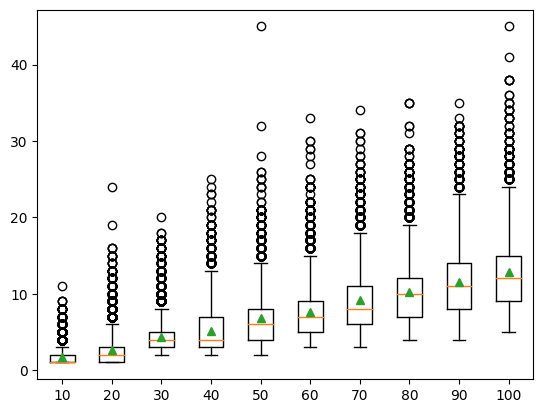

In [ ]:
foo = plt.boxplot(pig_df,showmeans=True,labels=goals)
# assigning to foo just to avoid printing out the result


I'm having trouble understanding the data; maybe we can see a histogram for each goal?

Histogram for 10


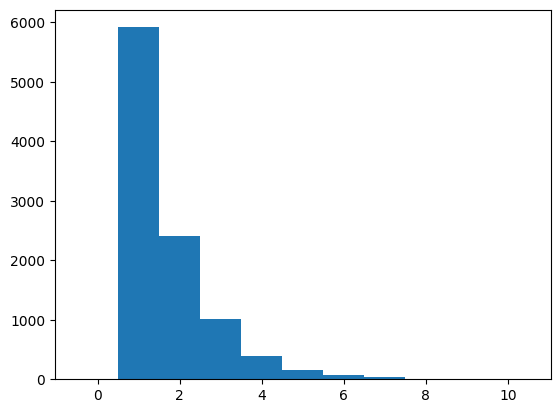

Histogram for 20


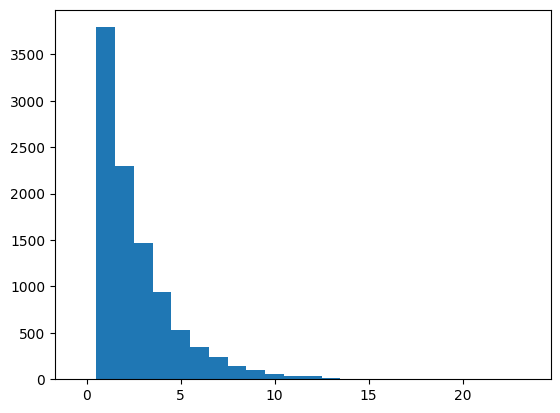

Histogram for 30


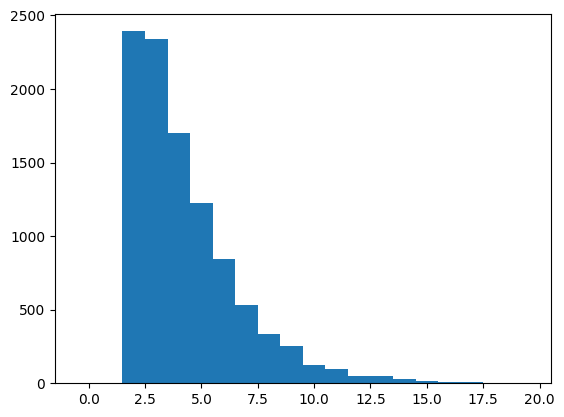

Histogram for 40


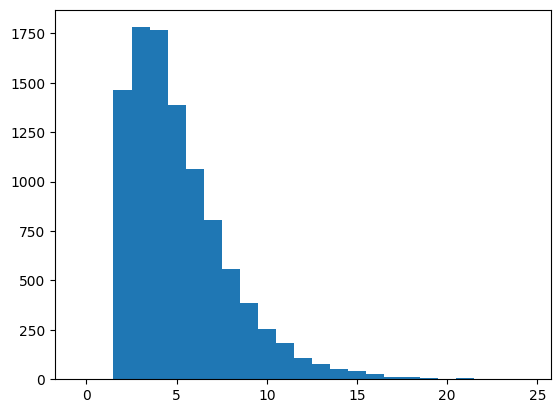

Histogram for 50


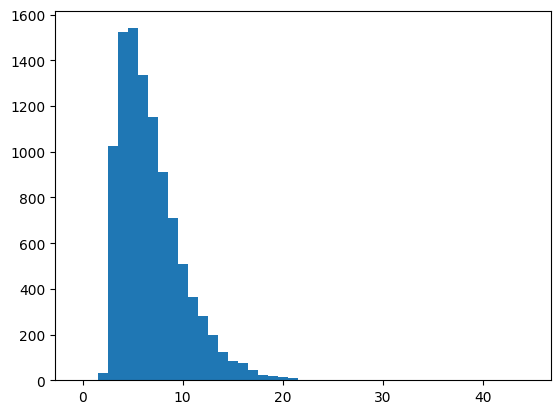

Histogram for 60


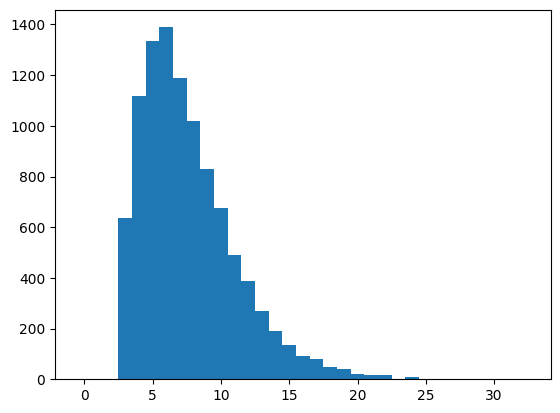

Histogram for 70


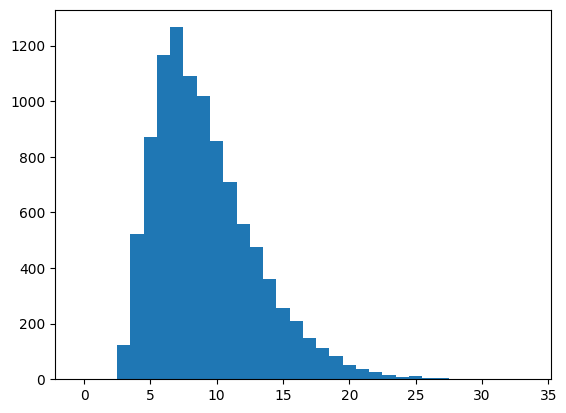

Histogram for 80


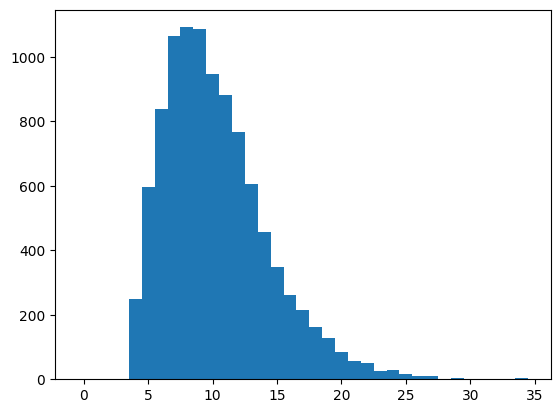

Histogram for 90


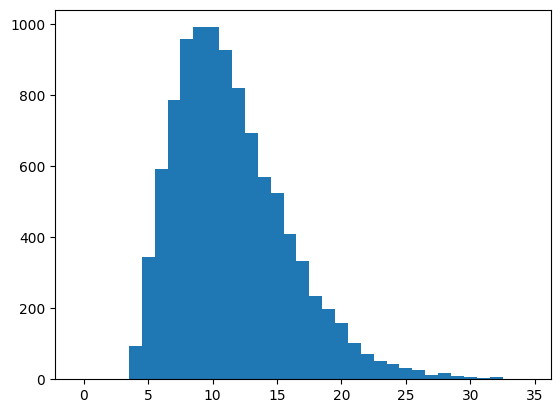

Histogram for 100


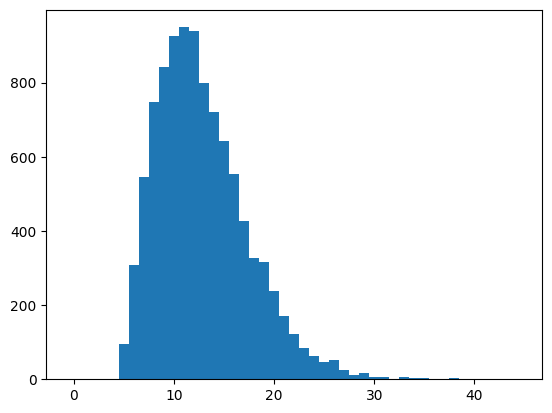

In [ ]:
for goal in goals:
  print(f'Histogram for {goal}')
  data = pig_df[goal]
  # print(data)
  plt.hist(data, bins = np.arange(0,max(data)+1), align = 'left')
  plt.show()

# Part 3 - Calculating expected value

This is part 3 in the Pig series. In this section, rather than run a simulation of games using a random number generator, we'll attempt to directly calculate the expected value of the number of turns needed to complete the game, and then compare those calculations to what we observed in the simulations.

Can we calculate the expected number of turns remaining to reach our goal?

The approach we're going to take is to calculate the probability of arriving at the goal, and then based on that, the expected number of "failure" turns that we might also see. It's an infinite sum, but it converges.

In [ ]:
def ProbSuccess(starting_score, current_score, goal, RollAgainFunction):

  # this should not happen, because if the starting_score is at or above the goal, the game is over
  assert (starting_score < goal)

  points = current_score - starting_score
  if not RollAgainFunction(starting_score, points, goal):
    return 1      # we've either hit our goal, or made a decision to stop rolling and book the turn
  # end if

  # if we haven't returned by now, then we're in a state where we are going to roll again
  # the probability of success is the probability of success after each of the possible successful rolls
  # it's recursive, we simulate the game, starting from a position that's a bit closer to the goal
  # the tree to explore exhaustively would be rather large,
  # but after at most 6 rolls (and usually 4 or 5) we're guaranteed to exceed 20 points

  p = 0
  for roll in range(2, 7): # rolls from 2..6
    # each has a 1/6 chance of being rolled
    p += (1/6) * ProbSuccess(starting_score, current_score + roll, goal, RollAgainFunction)
  # end for

  return p
# end ProbSuccess

def TurnsToSuccess(p):
  # given the probability of success, how many turns are expected (being as there will be some failures)
  # it's an infinite series, but decaying geometrically, so we'll calculate it until the difference is immaterial

  ev = 0

  prior_ev = -1 # initialized to ensure the while passes at least once
  i = 1 # a counter of the number of turns
  q = 1 - p # the odds of not success
  while (ev - prior_ev > 0.0001):
    prior_ev = ev
    ev += p * q ** (i-1) * i
    i += 1
  # end while

  return ev
# end TurnsToSuccess


The hardest part to understand is the summation in ExpectedNumTurns(p).

Let's take the base case, for example. Say we're at 99 points with a goal of 100, so we just need a single point to win. The expected number of turns is not 1, because we might roll a 1 and then we'd have to roll again. There's a 1/36 chance that we roll two 1s in a row and it takes us 3 rolls total to get the one point we need.

p in this case is 5/6, we have a 5/6 probability of success.
q is the probability of failure, which is 1/6.
That's what we count the first time through the loop, with q^0 being one.
So expanding out the loop, it goes:
ev = (5/6 * 1) + (1/6 * 5/6 * 2) + (1/6^2 * 5/6 * 3) + ...
The value in this case converges to 1.2.

But when we're farther away from the goal, the probability of success is much lower. Specifically, at a distance of >20 from the goal (which is the case when starting the game to 100 at 0 points), the probability of success is closer to 35% (that you'll end a turn with 21 or more points) and the expected number of turns needed is around 2.8.

Let's try it out for some small games:

In [ ]:
for goal in range(10,21):

  p = ProbSuccess(0, 0, goal, RollAgain20)
  nt = TurnsToSuccess(p)

  print(f'Probability of Success for goal = {goal} is {p}. Expected # turns is {nt}')

# end for


Probability of Success for goal = 10 is 0.5904063786008229. Expected # turns is 1.6936899341562945
Probability of Success for goal = 11 is 0.5636359739368997. Expected # turns is 1.7741283433057164
Probability of Success for goal = 12 is 0.5378086419753085. Expected # turns is 1.8593199684820838
Probability of Success for goal = 13 is 0.5136924154092362. Expected # turns is 1.9466000562403742
Probability of Success for goal = 14 is 0.49234467878372185. Expected # turns is 2.0309969571088593
Probability of Success for goal = 15 is 0.4704497932860843. Expected # turns is 2.12550537372555
Probability of Success for goal = 16 is 0.4496480147843315. Expected # turns is 2.223878722311654
Probability of Success for goal = 17 is 0.42965525056520837. Expected # turns is 2.3273424263765357
Probability of Success for goal = 18 is 0.4106572573731137. Expected # turns is 2.434987715423487
Probability of Success for goal = 19 is 0.392631692138097. Expected # turns is 2.5467475529039527
Probability o

If you recall, up above we ran the simulations of the game, so you can compare the expected # turns we've calculated here to the averages that we observed previously. And indeed, they're close.

But the code only works for games up to 20, and we need to make it work for goals above 20, especially since the standard game is to 100.

My plan is to daisy chain the expected values.

That is, we'll calculate the expected number of turns needed to either reach the goal or stop the turn due to having exceeded 20 points, and then separately calculate the expected number of turns needed to reach the goal from there.

But unlike the die rolls, those interim outcomes are not evenly distributed: one is much more likely to stop on a 21 or 22 than with 26 points (which requires landing on 20 and then rolling a 6).

So we need to count how many times each possibility occurs, and weigh the contribution to the expected value according to their proportion of the outcomes from that first round.

The concept we're going to introduce here is that of a "round". A "round" is when you keep trying until you hit success, either the goal or a stop at 20+ points.

Also, since we may land on different interim values after a successful round (e.g. after the 1st round, we might end up with 21, 22, 23... 26 points) ... we need to track those values and how many times each one occurred. To do that, we introduce a dictionary called end_values.

In [ ]:
def ProbSuccessV2(starting_score, current_score, goal, end_values, RollAgainFunction):

  # end_values stores a count of how many times a turn ends on each possible end value
  # NOTE that a turn can end either by hitting the goal or by surpassing 20 points

  # this should not happen, because if the starting_score is at or above the goal, the game is over
  assert (starting_score < goal)

  points = current_score - starting_score
  if not RollAgainFunction(starting_score, points, goal):
    # we've either hit our goal, or made a decision to stop rolling and book the turn
    end_values[current_score] = end_values.get(current_score, 0) + 1
    return 1
  # end if

  # if we haven't returned by now, then we're in a state where we are going to roll again
  # the probability of success is the probability of success after each of the possible successful rolls
  # it's recursive, we simulate the game, starting from a position that's a bit closer to the goal
  # the tree to explore exhaustively would be rather large,
  # but after at most 6 rolls (and usually 4 or 5) we're guaranteed to exceed 20 points

  p = 0
  for roll in range(2, 7): # rolls from 2..6
    # each has a 1/6 chance of being rolled
    p += (1/6) * ProbSuccessV2(starting_score, current_score + roll, goal, end_values, RollAgainFunction)
  # end for

  return p
# end ProbSuccessV2

So now, let's see the end_turns in action, assuming we're trying to reach the goal of 20:

In [ ]:
goal = 20
end_values = {}
p = ProbSuccessV2(0, 0, goal, end_values, RollAgain20)

print(f'Probability of Success for goal = {goal} is {p}.')
print(end_values)

Probability of Success for goal = 20 is 0.3754591657987433.
{20: 2618, 21: 4110, 22: 3836, 23: 3405, 24: 2729, 25: 1667}


So now, let's try to solve the problem for larger goals, beyond 20.

Looking at the results above, the expected number of turns needed to reach 20 is 2.66, and the expected number of turns needed to hit 10 is 1.69. So the expected number of turns required to reach 30 should be around 4.35, the sum of those two. Let's see...

In [ ]:
def ExpectedNumTurns(starting_score, goal, RollAgainFunction):

  end_values = {}

  p = ProbSuccessV2(starting_score, starting_score, goal, end_values, RollAgainFunction)
  num_turns = TurnsToSuccess(p)

  total = sum(end_values.values())
  eNT = 0

  for ev, count in end_values.items():
    if ev >= goal:
      eNT += (count / total) * num_turns
    else:
      eNT += (count / total) * (num_turns + ExpectedNumTurns(ev, goal, RollAgainFunction))
    # end if
  # end for

  return eNT

# end ExpectedNumTurns


In [ ]:
goal = 30

nt = ExpectedNumTurns(0, 30, RollAgain20)
print(f'Expected # of turns to reach {goal} is {nt}')


Expected # of turns to reach 30 is 4.255948485421711


Well, that's pretty close, let's check against the Monte Carlo that we did (way up above) ... we tried values from 10 to 100 in increments of 10, and we'd expect the calculated expected value to be relatively close to the mean across 100,000 simulated games.

In [ ]:
for goal in goals:
  eNT = ExpectedNumTurns(0, goal, RollAgain20)
  mNT = pig_df[goal].mean()
  ratio = eNT / mNT
  print(f'Expected # of turns to reach {goal}: calculated = {eNT} simulated = {mNT} ratio = {ratio}')
# end for


Expected # of turns to reach 10: calculated = 1.6936899341562945 simulated = 1.6917 ratio = 1.0011762925792367
Expected # of turns to reach 20: calculated = 2.663266834066198 simulated = 2.6683 ratio = 0.9981137181224743
Expected # of turns to reach 30: calculated = 4.255948485421711 simulated = 4.2927 ratio = 0.9914386016776646
Expected # of turns to reach 40: calculated = 5.09319692738205 simulated = 5.1731 ratio = 0.9845541217803735
Expected # of turns to reach 50: calculated = 6.755782982778677 simulated = 6.8444 ratio = 0.9870526244489914
Expected # of turns to reach 60: calculated = 7.570614839016607 simulated = 7.6514 ratio = 0.9894417804606487
Expected # of turns to reach 70: calculated = 8.930201924059826 simulated = 9.1968 ratio = 0.9710118654379596
Expected # of turns to reach 80: calculated = 10.089428183922507 simulated = 10.2727 ratio = 0.9821593333712176
Expected # of turns to reach 90: calculated = 11.134793502421534 simulated = 11.4906 ratio = 0.9690349940317767
Expect

Well, that's pretty close. One thing to notice is that the discrepancies appear higher for goals that are not a multiple of 20, especially 70 and 90. At this point, I don't know if the discrepancies are due to a flaw in the logic for calculating the expected value, an error in implementation, or an artefact e.g. of how Python handles floating point. For the purposes of this exercise, I'm going to call it a day: the expected number of turns needed to reach 100 points in one-player, one-die Pig is between 12 and 13, calculated to be 12.63 but slightly higher (12.8 + or - 0.1) in simulations.

# Part 4 - Is 20 the optimal threshold?

Until now, we've been using "> (n = 20)" as the criteria for deciding to stop a roll. Are there any other values of n that perform better? Let's try n = 25.

In [ ]:
# the RollAgain25 function makes a decision, as to whether to roll again or not (it's the player's choice)
def RollAgain25(score, points, goal):

  if ((points > 25) or ((score + points) >= goal)):
    return False
  else:
    return True

In [ ]:
goal = 100
eNT = ExpectedNumTurns(0, goal, RollAgain25)
print(f'Expected # of turns to reach {goal}: calculated = {eNT}')

Expected # of turns to reach 100: calculated = 12.63982702152038


Wow! That's really close, but very slightly higher. I wonder if the simulation is similarly close?

In [ ]:
goals25 = np.arange(10, 101, 10)
pig_dict25 = ExperimentPig(10_000, goals25, RollAgain25)
pig_df25 = pd.DataFrame(pig_dict25)

print('Mean')
print(pig_df25.mean())
print()
print('Median')
print(pig_df25.median())

Mean
10      1.7045
20      2.6421
30      4.5984
40      5.3825
50      6.4761
60      8.3248
70      9.0810
80     10.3501
90     11.9808
100    12.8044
dtype: float64

Median
10      1.0
20      2.0
30      4.0
40      5.0
50      6.0
60      7.0
70      8.0
80      9.0
90     11.0
100    12.0
dtype: float64


OK, here we're getting a slightly *lower* mean, which means that 25 might perform better than 20, as a rule. But then again, this is a simulation of only 10,000 games, so there's some error bar on the value, the difference might not be statistically meaningful. What if we pitted the two rules against one another? For that, we'll need code that plays the two-player-game.

But first: explaining the rules of the two-player game.

The winner of the game is the player that reaches 100 points in the fewest number of turns. For now, for simplicity, we're going to ignore the state of the other player in the game in our roll decision function. If both players reach 100 points in the same number of turns, the game is a tie.

In [ ]:
def PlayPig2Player(goal, playerAName, playerBName, RollAgainFunctionA, RollAgainFunctionB):

  # first play PlayerA
  score = 0
  turns = 0

  while score < goal:
    turns += 1
    points = TakeATurn(score, goal, RollAgainFunctionA)
    score += points
  # end while

  turnsA = turns
  # print(f'{playerAName} took {turnsA} turns')

  # now play PlayerB
  score = 0
  turns = 0

  while score < goal:
    turns += 1
    points = TakeATurn(score, goal, RollAgainFunctionB)
    score += points
  # end while

  turnsB = turns
  # print(f'{playerBName} took {turnsB} turns')

  if (turnsA == turnsB):
    return 'tie'
  elif turnsA < turnsB:
    return playerAName
  else:
    return playerBName
  # end if
# end PlayPig2Player

Ok, let's try that out:

In [ ]:
PlayPig2Player(100, "Stop at 20", "Stop at 25", RollAgain20, RollAgain25)

'Stop at 25'

Ok, so now let's have them play a whole bunch of games:

In [ ]:
def ExperimentPig2Player(num_games, goal, playerAName, playerBName, RollAgainFunctionA, RollAgainFunctionB):

  game_outcomes = {}

  for i in range(0, num_games):
    winner = PlayPig2Player(goal, playerAName, playerBName, RollAgainFunctionA, RollAgainFunctionB)
    game_outcomes[winner] = game_outcomes.get(winner, 0) + 1
  # end for

  return game_outcomes
# end ExperimentPig2Player

num_games = 100_000
game_outcomes = ExperimentPig2Player(num_games, 100, "Stop at 20", "Stop at 25", RollAgain20, RollAgain25)
num_games_not_tied = num_games - game_outcomes['tie']
print(f'Stop at 20 won {game_outcomes["Stop at 20"]} or {game_outcomes["Stop at 20"] / num_games_not_tied}')
print(f'Stop at 25 won {game_outcomes["Stop at 25"]} or {game_outcomes["Stop at 25"] / num_games_not_tied}')
print(f'Tie games: {game_outcomes["tie"]}')


Stop at 20 won 45674 or 0.48689330220559235
Stop at 25 won 48133 or 0.5131066977944077
Tie games: 6193


So this is interesting. Despite having a higher calculated expected value for the number of turns to reach 100 points, the "stop at 25" rule slightly outperforms "stop at 20". Perhaps because the shape of the distribution is not normal? A distribution where a higher percentage of the games have a lower value than the mean, at the cost of a few that extend into very large values... since it doesn't matter by how much you lose, it's better to use the probability distribution that is more heavilty populated by low values. Can we see this in a distribution? Let's compare the histogram at 25 with the histogram at 20: